In [16]:
from sklearn.model_selection import train_test_split
import pandas as pd
#importation de DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
#Importaion du StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import warnings
import matplotlib.pyplot as plt
from matplotlib import pyplot
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('Clustring.xlsx')
print(df.shape)
df.head()

(1439, 90)


,city,NB_Emp,Size_Comp,Sect_Comp,Opert_Princ,Opert_Period,Abonnement_Orange,Abonnement_Ooredoo,Abonnement_Telecom,Opert_Princ_Type_Offer,...,Ooredoo,TunisieTélécom,Info_Facility_Understand_numeric,Visit_Eval_numeric,Store_Staff_numeric,Request_Comprehension_numeric,Proposed_solution_in_Store_numeric,privileged welcome as a business customer_numeric,Profiling_Kmeans,satisfaction
0,TUNIS,20,10-24,Industrie,Ooredoo,1 an à moins de 2 ans,Les abonnements mobiles sont fournis par l’en...,Les abonnements mobiles sont fournis par l’en...,999,Offre mobile prépayée,...,1,0,999,999,999,999,999,999,2,moins satisfait
1,TUNIS,11,10-24,Services,Orange,3 ans ou plus,Certains ou tous les employés ont leur propre...,999,999,Offre mobile postpayé,...,0,0,11,999,999,999,999,999,2,moins satisfait
2,TUNIS,11,10-24,Services,Orange,3 ans ou plus,Certains ou tous les employés ont leur propre...,999,999,Offre mobile prépayée,...,0,0,6,999,999,999,999,999,2,moins satisfait
3,TUNIS,10,10-24,Industrie,Ooredoo,3 mois à moins de 6 mois,999,Les abonnements mobiles sont fournis par l’en...,999,Offre mobile prépayée,...,1,0,999,999,999,999,999,999,2,moins satisfait
4,TUNIS,29,25-50,Industrie,Ooredoo,3 ans ou plus,Certains ou tous les employés ont leur propre...,Les abonnements mobiles sont fournis par l’en...,999,Offre mobile postpayé,...,1,0,9,999,999,999,999,999,2,moins satisfait


In [4]:
#data = pd.get_dummies(df,drop_first=True)
data= df.apply(lambda x: pd.factorize(x)[0])
print(data.shape)
data

(1439, 90)


,city,NB_Emp,Size_Comp,Sect_Comp,Opert_Princ,Opert_Period,Abonnement_Orange,Abonnement_Ooredoo,Abonnement_Telecom,Opert_Princ_Type_Offer,...,Ooredoo,TunisieTélécom,Info_Facility_Understand_numeric,Visit_Eval_numeric,Store_Staff_numeric,Request_Comprehension_numeric,Proposed_solution_in_Store_numeric,privileged welcome as a business customer_numeric,Profiling_Kmeans,satisfaction
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,0,1,0,1,1,1,1,1,0,0,...,1,0,2,0,0,0,0,0,0,0
3,0,2,0,0,0,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,1,0,0,1,1,0,0,1,...,0,0,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,0,22,1,6,2,1,0,1,1,0,...,1,1,5,4,7,8,3,0,2,2
1435,1,8,0,2,2,1,0,1,1,0,...,1,1,2,1,2,1,4,0,2,2
1436,0,20,1,3,2,0,0,1,1,0,...,1,1,4,9,7,8,3,0,2,2
1437,0,17,1,3,2,1,0,1,1,0,...,1,1,6,5,6,1,5,0,2,2


In [5]:
#Partition de la dataframe en une variable à expliquer et des variable explicatives
y= data["satisfaction"]
X= data.drop("satisfaction",axis=1)

In [42]:
from sklearn.preprocessing import RobustScaler
#instanciation de l'objet
sc = RobustScaler()
#transformation – centrage-réduction
X= sc.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=43)

In [44]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print('Accuracy of DecisionTree on training set: {:.4f}'.format(dt.score(X_train, y_train)))
print('Accuracy of DecisionTree on test set: {:.4f}'.format(dt.score(X_test, y_test)))

Accuracy of DecisionTree on training set: 1.0000
Accuracy of DecisionTree on test set: 0.9907


In [22]:
y_pred = dt.predict(X_test)

In [23]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       267
           1       1.00      0.95      0.98        86
           2       0.98      1.00      0.99        79

    accuracy                           0.99       432
   macro avg       0.99      0.98      0.99       432
weighted avg       0.99      0.99      0.99       432



In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [13]:
XGBM=XGBClassifier()

In [14]:
XGBM.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:28:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
print('Accuracy of XGBClassifier on training set: {:.4f}'.format(XGBM.score(X_train, y_train)))
print('Accuracy of XGBClassifier on test set: {:.4f}'.format(XGBM.score(X_test, y_test)))

Accuracy of XGBClassifier on training set: 1.0000
Accuracy of XGBClassifier on test set: 1.0000


In [25]:
y_pred = XGBM.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        81

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



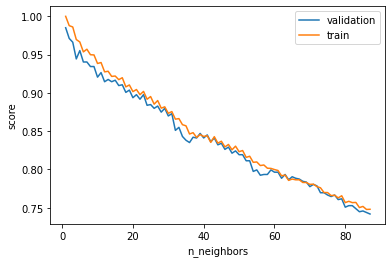

In [33]:
from sklearn.model_selection import validation_curve
model = KNeighborsClassifier()
k = np.arange(1, 88)

train_score, val_score = validation_curve(model, X_train, y_train,
                                          'n_neighbors', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 88),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87])})

In [41]:
model = grid.best_estimator_
print(model)
model.score(X_test, y_test)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)


0.9861111111111112

In [37]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of KNN on training set: {:.4f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN on test set: {:.4f}'.format(knn.score(X_test, y_test)))

Accuracy of KNN on training set: 0.9682
Accuracy of KNN on test set: 0.9306


In [114]:
y_pred = knn.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       226
           1       0.91      1.00      0.95        61
           2       0.93      0.97      0.95        73

    accuracy                           0.97       360
   macro avg       0.95      0.98      0.96       360
weighted avg       0.97      0.97      0.97       360



In [115]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [116]:
std_slc = StandardScaler()

pca = decomposition.PCA()

dec_tree = tree.DecisionTreeClassifier()

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

n_components = list(range(1,X.shape[1]+1,1))

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [117]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20, 21, 22, 23, 24, 25, 26,
                                               27, 28, 29, 30, ...]})

In [118]:
clf_GS.best_estimator_

Pipeline(steps=[('std_slc', StandardScaler()), ('pca', PCA(n_components=6)),
                ('dec_tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=8))])

In [119]:
print('Accuracy of KNN on training set: {:.4f}'.format(clf_GS.score(X_train, y_train)))
print('Accuracy of KNN on test set: {:.4f}'.format(clf_GS.score(X_test, y_test)))

Accuracy of KNN on training set: 1.0000
Accuracy of KNN on test set: 1.0000


In [120]:
y_pred = clf_GS.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00        76

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score

models = []

models.append(("LogisticRegression",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
rf2 = RandomForestClassifier(n_estimators=100, criterion='gini',
                                max_depth=10, random_state=0, max_features=None)
models.append(("RandomForest2",rf2))
models.append(("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=0)))


results = []
names = []
for name,model in models:
    result = cross_val_score(model, X_train, y_train,  cv=3)
    names.append(name)
    results.append(result)
l=[]
for i in range(len(names)):
    print(names[i],results[i].mean())
    l.append(results[i].mean())

LogisticRegression 0.9950337597725657
SVC 0.9970178867566927
LinearSVC 0.9970178867566927
KNeighbors 0.9692164179104478
DecisionTree 0.9940387348969439
RandomForest 0.9980129116323146
RandomForest2 0.9960287846481877
MLPClassifier 0.9940387348969439


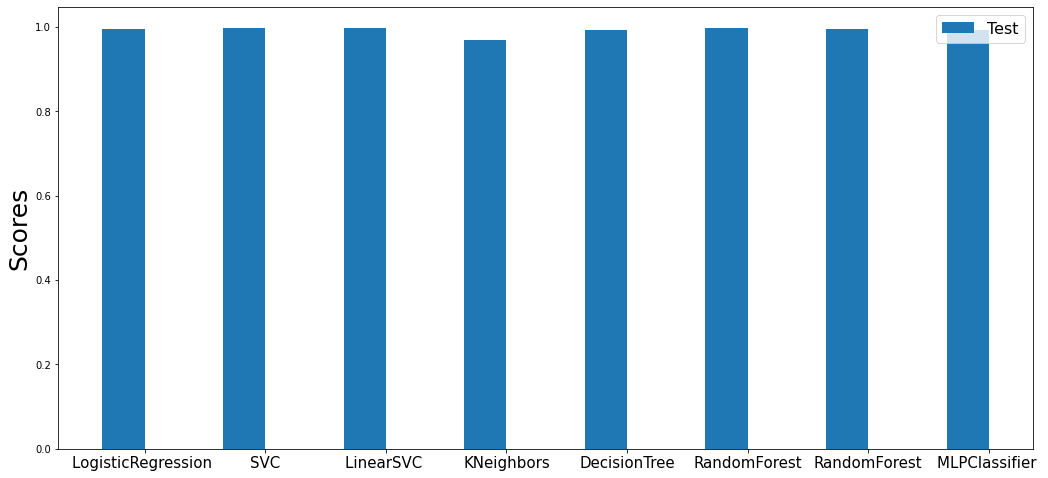

In [62]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['LogisticRegression ', 'SVC','LinearSVC ', 'KNeighbors', 'DecisionTree','RandomForest','RandomForest','MLPClassifier ']


test =l
train = l

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, test, width, label='Test')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores',fontsize = 25)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize = 15)
ax.legend(fontsize = 16)
fig.set_figheight(7)
fig.set_figwidth(15)
fig.tight_layout(pad=2,h_pad=3,w_pad=5)
fig.savefig('comp.jpg')
plt.show()